Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


Continuing our feature analysis while dropping the zero risk rows, yet maintaining the situation feature this time. Again the remainder of the analysis is the same.

In [3]:
slidings = slidings[slidings.risk!=0]
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
959,0,3,3,0,0,0,0,0,0,19.7
961,0,3,2,0,0,0,0,0,0,88.9
962,0,3,2,0,0,0,0,0,0,0.0
964,0,3,3,0,0,0,0,0,1,4.5
965,0,3,2,0,0,0,0,0,1,0.0


In [4]:
slidings['risk'].value_counts()

3    4715
2    1878
4    1017
1     322
Name: risk, dtype: int64

In [5]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 959 to 45894
Data columns (total 10 columns):
situation         7932 non-null int64
location          7932 non-null int64
risk              7932 non-null int64
victims           7932 non-null int64
deadly_victims    7932 non-null int64
length            7932 non-null int64
num_points        7932 non-null int64
in_place          7932 non-null int64
sliding           7932 non-null int64
Rain              7932 non-null float64
dtypes: float64(1), int64(9)
memory usage: 681.7 KB


In [6]:
slidings.sliding.value_counts()

0    4119
1    3813
Name: sliding, dtype: int64

In [7]:
random_state = 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding'},axis=1)
y= slidings['sliding']

model = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
X.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,Rain
959,0,3,3,0,0,0,0,0,19.7
961,0,3,2,0,0,0,0,0,88.9
962,0,3,2,0,0,0,0,0,0.0
964,0,3,3,0,0,0,0,0,4.5
965,0,3,2,0,0,0,0,0,0.0


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       827
           1       0.95      0.93      0.94       760

    accuracy                           0.95      1587
   macro avg       0.95      0.95      0.95      1587
weighted avg       0.95      0.95      0.95      1587



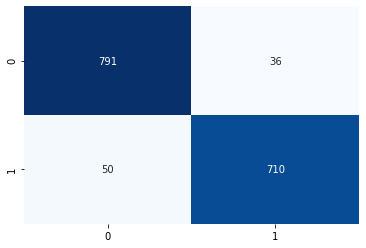

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

We will now variate the maximum depth and the number of estimators, and compare the precision of the model guessing there was a sliding(1) and the accuracy.

The maximum precision for  2  depth found was  1.000  with  20  estimators.
The maximum accuracy for  2  depth found was  0.953  with  10  estimators.

The maximum precision for  3  depth found was  0.997  with  25  estimators.
The maximum accuracy for  3  depth found was  0.955  with  25  estimators.

The maximum precision for  4  depth found was  0.997  with  70  estimators.
The maximum accuracy for  4  depth found was  0.955  with  70  estimators.

The maximum precision for  5  depth found was  0.996  with  15  estimators.
The maximum accuracy for  5  depth found was  0.955  with  30  estimators.

The maximum precision for  6  depth found was  0.991  with  15  estimators.
The maximum accuracy for  6  depth found was  0.955  with  15  estimators.

The maximum precision for  7  depth found was  0.989  with  10  estimators.
The maximum accuracy for  7  depth found was  0.954  with  10  estimators.



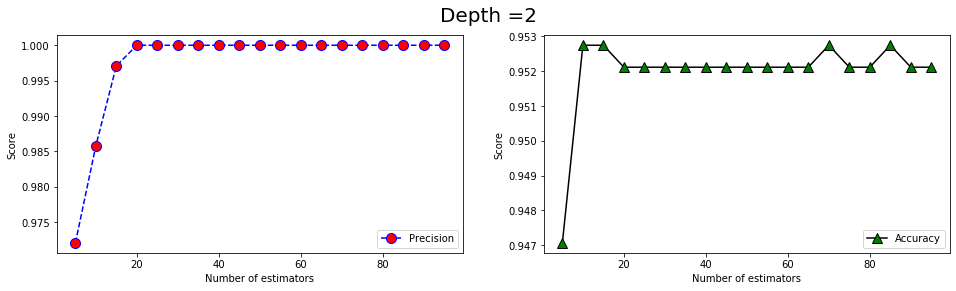

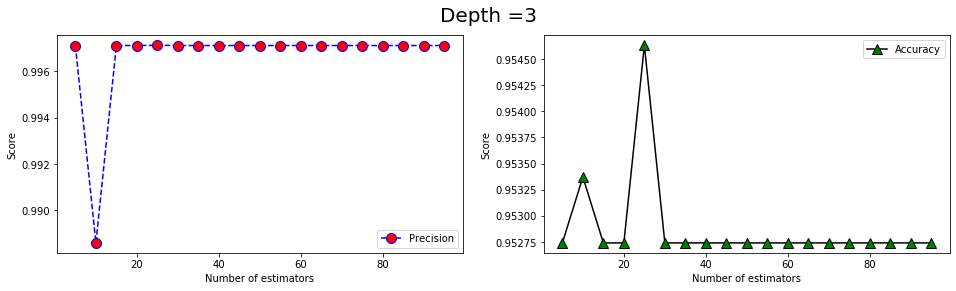

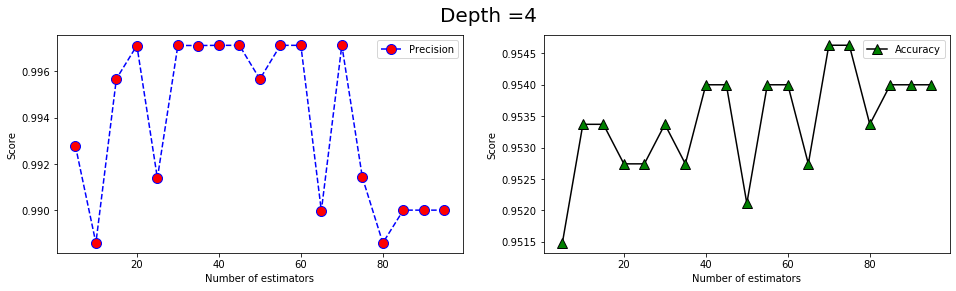

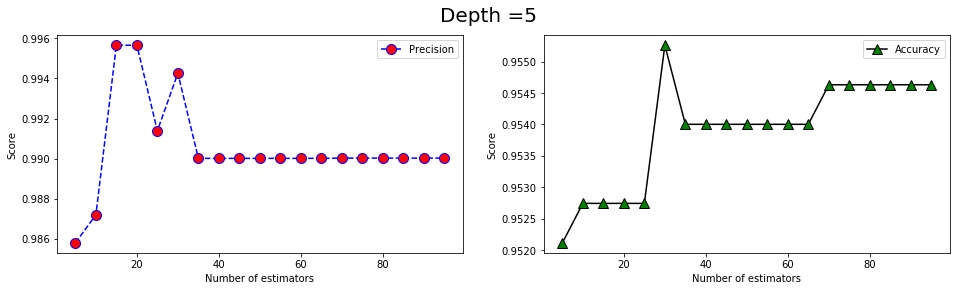

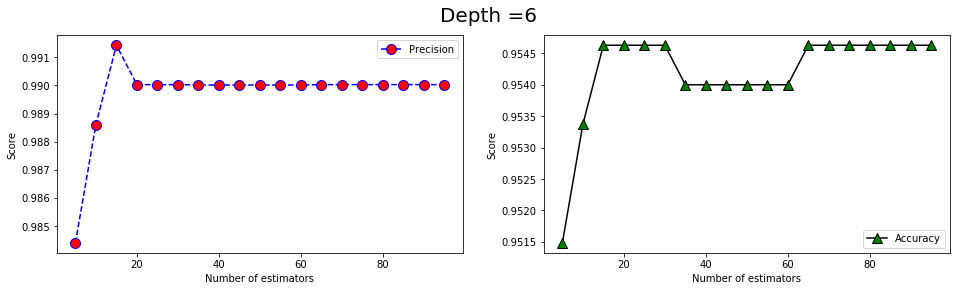

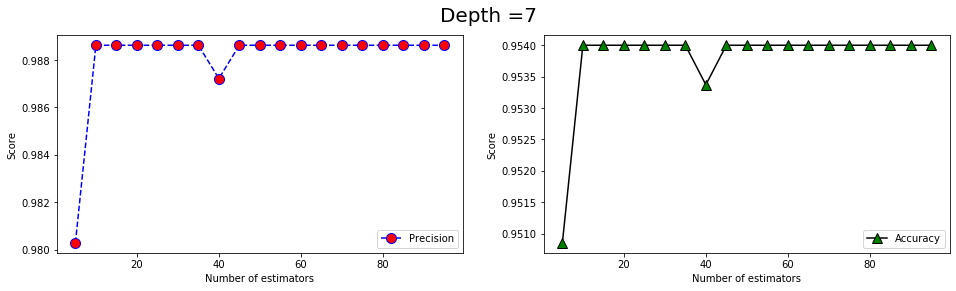

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,8):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        precision.append(precision_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    ax1.legend()
    ax2.legend()
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    

After depth 3 the variation for both the precision and accuracy is only on the third decimal case, so we will proceed with depth = 3 and estimators = 25(best accuracy), and take a more in-depth look with these hyperparameters.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       827
           1       1.00      0.91      0.95       760

    accuracy                           0.95      1587
   macro avg       0.96      0.95      0.95      1587
weighted avg       0.96      0.95      0.95      1587



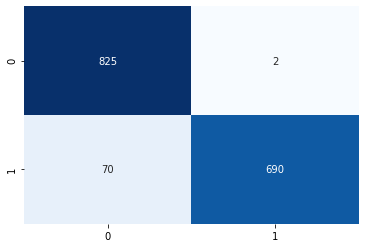

In [11]:
depth = 3
estimators = 25
model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [12]:
model.score(X,y)

0.9527231467473525

Validating with cross validation.

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
scores

array([0.94710327, 0.9861461 , 0.98865069, 0.76166456, 1.        ,
       1.        , 0.97982346, 0.96469105, 0.99495586, 0.87263556])

In [14]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.14)


In [15]:
scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       0.9972752, 1.       , 1.       , 1.       ])

In [17]:
print("precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

precision: 1.00 (+/- 0.00)


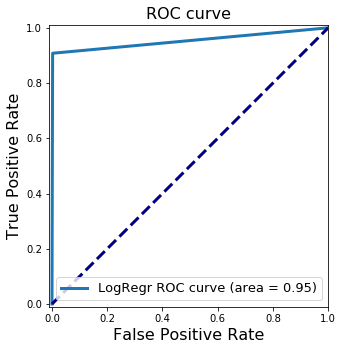

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [19]:
importances = model.feature_importances_
for i in range(X.shape[1]):
    print( X.columns[i],"%.4f" % importances[i])

situation 0.6677
location 0.0876
risk 0.0324
victims 0.0007
deadly_victims 0.0001
length 0.0501
num_points 0.0011
in_place 0.0029
Rain 0.1574


This model so far is the best, so good we can even think it is overfitted, but the situation feature remains too heavy, despite having lost considerable weight. So we will see how the model behaves with no situation and no zero risk rows.